In [1]:
import os
import json
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import pandas as pd
import numpy as np

In [2]:
cid ='d8762235995b4ddcbc0df90739df9a63' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '887a4eccdbde4195bfc0f7f4c472fe70' # Client Secret; copy this from your app
username = '12155311349' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://localhost:8080/callback/'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username,scope,client_id=cid,client_secret=secret,redirect_uri="https://localhost:8080/callback/")

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)


In [3]:
rockPlaylistID ='https://open.spotify.com/playlist/37i9dQZF1DWXRqgorJj26U?si=b4fc7abf24d943b7' #Rock Playlist
countryPlaylistID = 'https://open.spotify.com/playlist/37i9dQZF1DWZBCPUIUs2iR?si=8aa077376b294156' 

rockPlaylist = sp.user_playlist(username, rockPlaylistID);
countryPlaylist = sp.user_playlist(username, countryPlaylistID);

rockTracks = rockPlaylist["tracks"];
rockSongs = rockTracks["items"];
countryTracks = countryPlaylist["tracks"];
countrySongs = countryTracks["items"];

#Putting Track ID, Track Name, Album, and artist name in matrix's
#Rock Features
r_track_ids = [] 
r_track_names = []
r_album = []
r_artist =[]

#Country Features
c_track_ids = [] 
c_track_names = []
c_album = []
c_artist =[]

#Getting Rock Data
for i in range(0, len(rockSongs)):
    if rockSongs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        r_track_ids.append(rockSongs[i]['track']['id'])
        r_track_names.append(rockSongs[i]['track']['name'])
        r_album.append(rockSongs[i]['track']['album']['name'])
        r_artist.append(rockSongs[i]['track']['artists'][0]['name'])

r_features = []
for i in range(0,len(rockSongs)):
    r_audio_features = sp.audio_features(r_track_ids[i])
    for track in r_audio_features:
      
      if track is None:
        print(track)
        r_features.append({'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 0, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0, 'type': 'audio_features', 'id': '00000', 'uri': 'spotify:track:0', 'track_href': 'https://api.spotify.com/', 'analysis_url': 'https://api.spotify.com/', 'duration_ms': 0, 'time_signature': 0})
      else:
        r_features.append(track)
        
r_df = pd.DataFrame(r_features, index = r_track_names)
rock_matrix = r_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

#Getting Country Data
for i in range(0, len(countrySongs)):
    if countrySongs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        c_track_ids.append(countrySongs[i]['track']['id'])
        c_track_names.append(countrySongs[i]['track']['name'])
        c_album.append(countrySongs[i]['track']['album']['name'])
        c_artist.append(countrySongs[i]['track']['artists'][0]['name'])

c_features = []
for i in range(0,len(countrySongs)):
    c_audio_features = sp.audio_features(c_track_ids[i])
    for track in c_audio_features:
      
      if track is None:
        print(track)
        c_features.append({'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 0, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0, 'type': 'audio_features', 'id': '00000', 'uri': 'spotify:track:0', 'track_href': 'https://api.spotify.com/', 'analysis_url': 'https://api.spotify.com/', 'duration_ms': 0, 'time_signature': 0})
      else:
        c_features.append(track)
        
        
c_df = pd.DataFrame(c_features, index = c_track_names)
#Useful for Displaying the Data
country_matrix = c_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

In [4]:
rock_matrix.head()
country_matrix.head()
#playlist_matrix for the whole table

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
You Look So Good In Love,0.642,0.233,9,-16.568,1,0.0298,0.4350,0.000000,0.1050,0.333,114.495
Two Dozen Roses,0.695,0.502,4,-12.010,1,0.0279,0.3270,0.000000,0.0970,0.543,117.083
Check Yes Or No,0.708,0.524,5,-12.644,1,0.0352,0.0551,0.000003,0.0371,0.690,111.482
Whiskey Glasses,0.614,0.680,6,-4.580,1,0.0289,0.3690,0.000002,0.1150,0.707,149.959
The Gambler,0.671,0.501,4,-13.119,1,0.0594,0.3420,0.000000,0.1940,0.860,87.040


In [5]:
#Checking the Rock Data
rock_matrix.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.540930,0.740600,5.340000,-7.846270,0.770000,0.062402,0.129916,0.056157,0.176222,0.591060,124.833830
std,0.138606,0.169455,3.414822,2.810143,0.422953,0.056547,0.164956,0.134900,0.118285,0.216911,22.988906
min,0.249000,0.366000,0.000000,-18.064000,0.000000,0.024900,0.000018,0.000000,0.024400,0.104000,78.031000
25%,0.451250,0.630000,2.000000,-9.377500,1.000000,0.033300,0.003802,0.000031,0.086900,0.438750,112.731000
50%,0.539000,0.748000,5.000000,-7.567500,1.000000,0.044600,0.061050,0.000734,0.138500,0.606000,124.374000
75%,0.643500,0.901250,9.000000,-5.690750,1.000000,0.069525,0.202250,0.020800,0.268250,0.765000,137.458500
max,0.933000,0.987000,11.000000,-2.788000,1.000000,0.405000,0.619000,0.836000,0.659000,0.964000,195.815000


In [6]:
#Checking the Country Data
country_matrix.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.595270,0.521638,5.230000,-9.661150,0.970000,0.037335,0.414205,0.003719,0.160291,0.597130,120.394910
std,0.119342,0.196690,3.299388,3.698335,0.171447,0.013821,0.262583,0.018833,0.120543,0.203256,30.379754
min,0.259000,0.056800,0.000000,-20.508000,0.000000,0.024300,0.004810,0.000000,0.035100,0.137000,70.554000
25%,0.516250,0.400000,2.750000,-12.601250,1.000000,0.029650,0.219000,0.000000,0.087125,0.454250,95.433250
50%,0.604000,0.506000,5.000000,-9.261500,1.000000,0.032300,0.383000,0.000002,0.115500,0.637000,116.854500
75%,0.681500,0.668250,7.250000,-6.781500,1.000000,0.039025,0.641000,0.000329,0.203500,0.731000,137.030750
max,0.901000,0.948000,11.000000,-3.318000,1.000000,0.103000,0.960000,0.156000,0.893000,0.962000,204.016000


In [1]:
import plotly.graph_objects as go
import plotly.offline as pyo

plot_rock = r_df[['danceability','energy','mode','speechiness','acousticness','instrumentalness','liveness','valence']]
plot_country = c_df[['danceability','energy','mode','speechiness','acousticness','instrumentalness','liveness','valence']]

categories = ['danceability','energy','mode','speechiness','acousticness','instrumentalness','liveness','valence']
# plot_rock = r_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
# plot_country = c_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

# categories = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
categories = [*categories, categories[0]]

mean_r = plot_rock.mean().values
mean_c = plot_country.mean().values

mean_r = [*mean_r, mean_r[0]]
mean_c = [*mean_c, mean_c[0]]
# restaurant_2 = [*restaurant_2, restaurant_2[0]]
# restaurant_3 = [*restaurant_3, restaurant_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_r, theta=categories, name='Rock Music',fill='toself',),
        go.Scatterpolar(r=mean_c, theta=categories, name='Country Music',fill='toself',)
#         go.Scatterpolar(r=restaurant_2, theta=categories, fill='toself', name='Restaurant 2'),
#         go.Scatterpolar(r=restaurant_3, theta=categories, fill='toself', name='Restaurant 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Genre comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True,
    )
)

pyo.plot(fig)

NameError: name 'r_df' is not defined

In [ ]:
mean_c = country_matrix.mean().values[10] #Index 10 retrieves the tempo
mean_c

In [38]:
country_tempo = country_matrix
country_tempo

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
You Look So Good In Love,0.642,0.233,9,-16.568,1,0.0298,0.43500,0.000000,0.1050,0.333,114.495
Two Dozen Roses,0.695,0.502,4,-12.010,1,0.0279,0.32700,0.000000,0.0970,0.543,117.083
Check Yes Or No,0.708,0.524,5,-12.644,1,0.0352,0.05510,0.000003,0.0371,0.690,111.482
Whiskey Glasses,0.614,0.680,6,-4.580,1,0.0289,0.36900,0.000002,0.1150,0.707,149.959
The Gambler,0.671,0.501,4,-13.119,1,0.0594,0.34200,0.000000,0.1940,0.860,87.040
...,...,...,...,...,...,...,...,...,...,...,...
Body Like A Back Road,0.732,0.458,5,-7.225,1,0.0311,0.44700,0.000000,0.1360,0.661,98.938
God Gave Me You,0.483,0.844,2,-5.043,1,0.0314,0.00481,0.000073,0.4050,0.543,151.977
I Will Always Love You,0.446,0.142,9,-13.498,1,0.0335,0.96000,0.001140,0.1010,0.156,135.724
19 Somethin' - Greatest Hits Version,0.580,0.816,4,-5.165,1,0.0726,0.13200,0.000000,0.0776,0.814,89.938


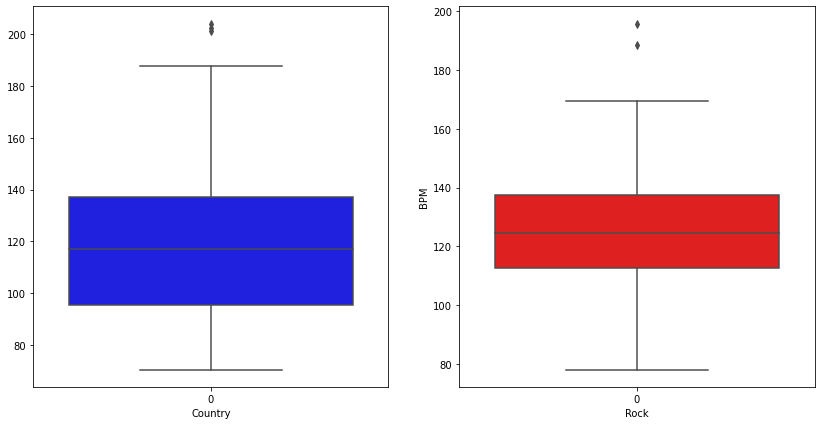

In [47]:
# BOXPLOTS of Tempo
import matplotlib.pyplot as plt
import seaborn as sns 
fig, ax = plt.subplots(1,2,figsize=(14,7))
sns.boxplot(data = country_matrix['tempo'],color="blue",ax=ax[0])
sns.boxplot(data = rock_matrix['tempo'],color="red",ax=ax[1])
ax[0].set_xlabel('Country')
ax[1].set_xlabel('Rock')
plt.ylabel('BPM')
plt.show()

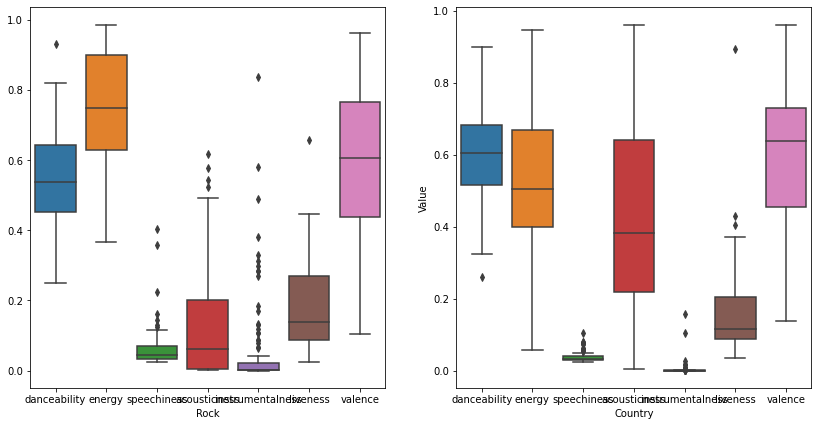

In [50]:
# BOXPLOTS of other data

r_box = rock_matrix.drop(columns = ['tempo','key','loudness','mode'])
c_box = country_matrix.drop(columns = ['tempo','key','loudness','mode'])
import matplotlib.pyplot as plt
import seaborn as sns 
fig, ax = plt.subplots(1,2,figsize=(14,7))
sns.boxplot(data = r_box,ax=ax[0])
sns.boxplot(data = c_box,ax=ax[1])
ax[0].set_xlabel('Rock')
ax[1].set_xlabel('Country')
plt.ylabel('Value')
plt.show()

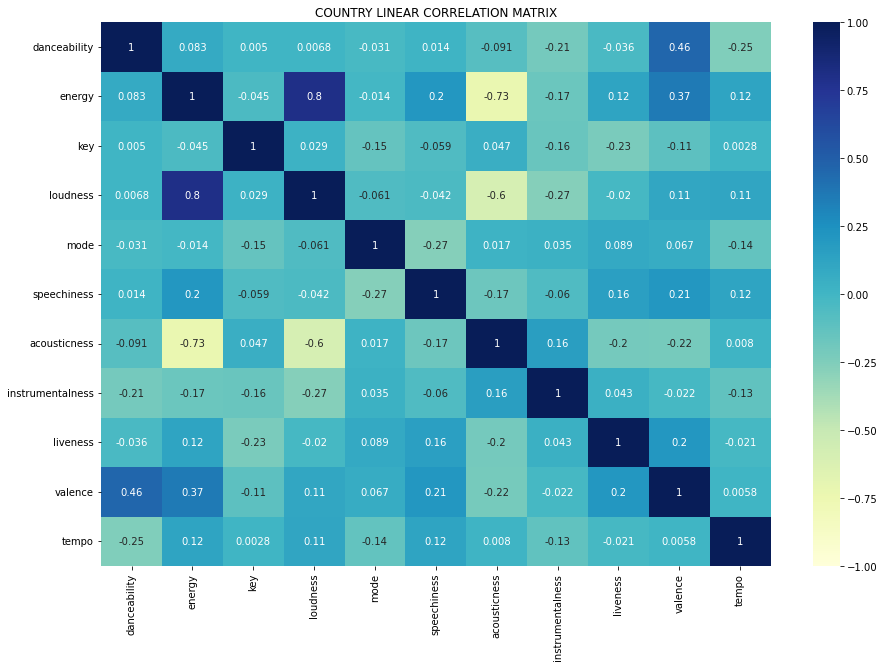

In [54]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(country_matrix.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('COUNTRY LINEAR CORRELATION MATRIX')
plt.show()

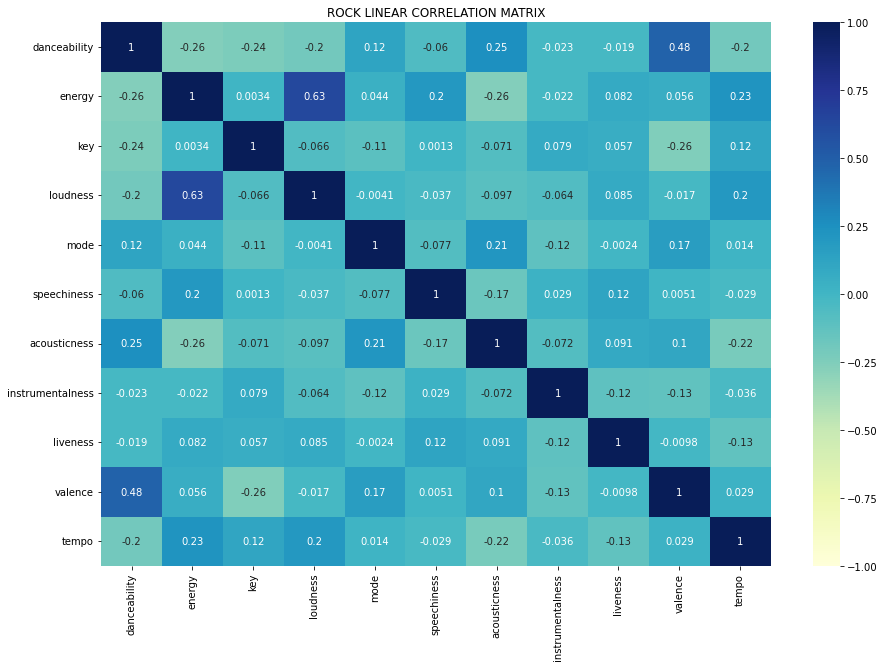

In [55]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(rock_matrix.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('ROCK LINEAR CORRELATION MATRIX')
plt.show()